# **Atendimento de violência contra a mulher em unidades de saúde: Dados do SINAN)**

    O presente estudo tem como objetivo coletar informações da base de dados do SINAN para traçar um perfil sobre a violência contra as mulheres, abordando as características do ocorrido, das vítimas e de seus agressores.  
    A maioria dos estudos sobre violência contra mulheres se concentram em feminicídio ou então em dados obtidos nas bases da área de segurança pública. Porém muitas mulheres que sofrem esse tipo de violência, por inúmeras razões, decidem não denunciar seu agressor. Já a base do SINAN é alimentada a partir das notificações feitas por unidades de saúde assim que a vítima procura por atendimento e essa notificação é obrigatória. Portanto os dados aqui analisados são de mulheres que precisaram de atendimento após sofrer uma agressão, e não, necessariamente, as que fizeram denúncia à polícia.   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df_dados_violencia = pd.read_csv("/content/SINAN-VIOL-2017-2019.csv", low_memory=False)
df_dados_violencia.shape

(232826, 161)

In [3]:
for i in df_dados_violencia.columns:
  print(i)

level_0
level_1
level_2
TP_NOT
ID_AGRAVO
DT_NOTIFIC
SEM_NOT
NU_ANO
SG_UF_NOT
ID_MUNICIP
TP_UNI_EXT
NM_UNI_EXT
CO_UNI_EXT
ID_UNIDADE
ID_REGIONA
ID_RG_RESI
DT_OCOR
SEM_PRI
DT_NASC
NU_IDADE_N
CS_SEXO
CS_GESTANT
CS_RACA
CS_ESCOL_N
SG_UF
ID_MN_RESI
ID_PAIS
NDUPLIC
DT_INVEST
ID_OCUPA_N
SIT_CONJUG
DEF_TRANS
DEF_FISICA
DEF_MENTAL
DEF_VISUAL
DEF_AUDITI
TRAN_MENT
TRAN_COMP
DEF_OUT
DEF_ESPEC
SG_UF_OCOR
ID_MN_OCOR
HORA_OCOR
LOCAL_OCOR
LOCAL_ESPE
OUT_VEZES
LES_AUTOP
VIOL_FISIC
VIOL_PSICO
VIOL_TORT
VIOL_SEXU
VIOL_TRAF
VIOL_FINAN
VIOL_NEGLI
VIOL_INFAN
VIOL_LEGAL
VIOL_OUTR
VIOL_ESPEC
AG_FORCA
AG_ENFOR
AG_OBJETO
AG_CORTE
AG_QUENTE
AG_ENVEN
AG_FOGO
AG_AMEACA
AG_OUTROS
AG_ESPEC
SEX_ASSEDI
SEX_ESTUPR
SEX_PUDOR
SEX_PORNO
SEX_EXPLO
SEX_OUTRO
SEX_ESPEC
PEN_ORAL
PEN_ANAL
PEN_VAGINA
PROC_DST
PROC_HIV
PROC_HEPB
PROC_SANG
PROC_SEMEN
PROC_VAGIN
PROC_CONTR
PROC_ABORT
CONS_ABORT
CONS_GRAV
CONS_DST
CONS_SUIC
CONS_MENT
CONS_COMP
CONS_ESTRE
CONS_OUTR
CONS_ESPEC
LESAO_NAT
LESAO_ESPE
LESAO_CORP
NUM_ENVOLV
REL_SEXUAL
REL

O dataset bruto tem 1.063.056 registros e 161 colunas. Inicialmente exclui os registros das vítimas do sexo masculino e as em que a lesão foi autoprovocada (tentativa de suicídio). Foram escolhidas 31 variáveis e após o processo de limpeza e tratamento dos dados restaram 564.432 registros para serem analisados.

In [4]:
df_dados_violencia = df_dados_violencia[['level_0', 'level_1','DT_NOTIFIC','DT_OCOR', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO',
                                         'CS_RACA', 'CS_ESCOL_N', 'LOCAL_OCOR', 'LES_AUTOP', 'VIOL_FISIC', 'VIOL_PSICO',
                                         'VIOL_TORT', 'VIOL_SEXU', 'SEX_ASSEDI', 'SEX_ESTUPR', 'SEX_EXPLO', 'SEX_PORNO',
                                         'SEX_OUTRO', 'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ', 'REL_EXCON',
                                         'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO', 'REL_CONHEC', 'REL_DESCO',
                                         'AUTOR_SEXO', 'OUT_VEZES']]

df_dados_violencia.rename(columns = {'level_0': 'UF', 'level_1': 'ANO'}, inplace = True)
df_dados_violencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232826 entries, 0 to 232825
Data columns (total 34 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UF          232826 non-null  object 
 1   ANO         232826 non-null  int64  
 2   DT_NOTIFIC  232826 non-null  object 
 3   DT_OCOR     232826 non-null  object 
 4   DT_NASC     228281 non-null  object 
 5   NU_IDADE_N  232826 non-null  float64
 6   CS_SEXO     232826 non-null  object 
 7   CS_RACA     231110 non-null  float64
 8   CS_ESCOL_N  219202 non-null  float64
 9   LOCAL_OCOR  232700 non-null  float64
 10  LES_AUTOP   230533 non-null  float64
 11  VIOL_FISIC  232056 non-null  float64
 12  VIOL_PSICO  231515 non-null  float64
 13  VIOL_TORT   230723 non-null  float64
 14  VIOL_SEXU   230754 non-null  float64
 15  SEX_ASSEDI  230063 non-null  float64
 16  SEX_ESTUPR  230402 non-null  float64
 17  SEX_EXPLO   229974 non-null  float64
 18  SEX_PORNO   229972 non-null  float64
 19  SE

<ipython-input-4-fff6c2bdde66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dados_violencia.rename(columns = {'level_0': 'UF', 'level_1': 'ANO'}, inplace = True)


Como o objetivo do estudo é fazer uma análise sobre a violência contra mulheres, vamos excluir os registros do sexo masculino e ignorados(CS_SEXO = M ou I) , e também os que tratam de lesões auto provocadas (LES_AUTOP = 1)

In [5]:
df_dados_violencia = df_dados_violencia[df_dados_violencia['CS_SEXO']=='F']
df_dados_violencia = df_dados_violencia[df_dados_violencia['LES_AUTOP']!=1]
df_dados_violencia.drop(['CS_SEXO', 'LES_AUTOP', 'DT_NOTIFIC'], axis = 1, inplace = True)
df_dados_violencia.dropna(subset=['DT_OCOR'], inplace = True)

df_dados_violencia['UF'] = df_dados_violencia['UF'].astype('category')
df_dados_violencia['ANO'] = df_dados_violencia['ANO'].astype('category')
df_dados_violencia['REL_PAI'] = pd.to_numeric(df_dados_violencia['REL_PAI'], errors='coerce')
df_dados_violencia['DT_NASC'] = pd.to_datetime(df_dados_violencia['DT_NASC'])
df_dados_violencia['DT_OCOR'] = pd.to_datetime(df_dados_violencia['DT_OCOR'])
df_dados_violencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130883 entries, 0 to 232825
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   UF          130883 non-null  category      
 1   ANO         130883 non-null  category      
 2   DT_OCOR     130883 non-null  datetime64[ns]
 3   DT_NASC     128280 non-null  datetime64[ns]
 4   NU_IDADE_N  130883 non-null  float64       
 5   CS_RACA     130017 non-null  float64       
 6   CS_ESCOL_N  123493 non-null  float64       
 7   LOCAL_OCOR  130802 non-null  float64       
 8   VIOL_FISIC  130539 non-null  float64       
 9   VIOL_PSICO  130307 non-null  float64       
 10  VIOL_TORT   129930 non-null  float64       
 11  VIOL_SEXU   129956 non-null  float64       
 12  SEX_ASSEDI  129348 non-null  float64       
 13  SEX_ESTUPR  129649 non-null  float64       
 14  SEX_EXPLO   129282 non-null  float64       
 15  SEX_PORNO   129275 non-null  float64       
 16  SEX_OUT

Muitos campos que são importantes para uma boa análise estão com um número alto de valores em branco: Idade, Raça, Escolaridade e Local da ocorrência.

> Adicionar aspas



In [6]:
# Registros sem idade e sem data de nasc.
sidade_snasc = df_dados_violencia[df_dados_violencia['NU_IDADE_N'].isna() & df_dados_violencia['DT_NASC'].isna()]

print(f'Há {len(sidade_snasc)} registros sem idade e sem a data de nascimento.')

Há 0 registros sem idade e sem a data de nascimento.


In [7]:
# Excluir os registros sem idade e sem data de nascimento
df_dados_violencia = df_dados_violencia

# **- Tratar o campo idade (NU_IDADE_N)**

De acordo com o dicionário de dados do SINAN, a composição da variável obedece o seguinte critério:

Primeiro digito:
1. Hora
2. Dia
3. Mês
4. Ano

Ex: 3009 – nove meses, 4018 – dezoito anos

Vamos colocar a idade em anos. Caso seja menor de 1 ano, dividimos (idade em meses)/12.
Se for menor que um mês recebe valor zero.  


In [8]:
# Colocar idade em anos
def calcula_idade(idade, nasc, ocor):
    if idade != idade: # Retorna True caso idade = nan
        return ocor.year - nasc.year - ((ocor.month, ocor.day) < (nasc.month, nasc.day))
    elif (idade > 4000):
        return idade - 4000
    elif (idade > 3000):
        return (idade - 3000)/12
    elif (idade > 1000):
        return 0
    else:
        return idade

df_dados_violencia['NU_IDADE_N'] = df_dados_violencia.apply(lambda row: calcula_idade(row['NU_IDADE_N'],
                                                                                      row['DT_NASC'],
                                                                                      row['DT_OCOR']), axis=1)

df_dados_violencia['NU_IDADE_N'].isnull().sum()

np.int64(0)

In [9]:
# Criar campo GRUPO_IDADE para agrupar idades e ter a visualização dos dados por faixa etária:
bins= [0, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 55, 60, 66, 120]
labels = ['< de 2 anos','2 a 5 anos','6 a 9 anos','10 a 13 anos','14 a 17 anos','18 a 21 anos','22 a 25 anos',
          '26 a 29 anos', '30 a 33 anos','34 a 37 anos','38 a 41 anos','42 a 45 anos','46 a 49 anos','50 a 54 anos',
          '55 a 59 anos','60 a 65 anos','> de 65 anos']

df_dados_violencia['GRUPO_IDADE'] = pd.cut(df_dados_violencia['NU_IDADE_N'], bins=bins, labels=labels,
                                           right=False).astype("category")
df_dados_violencia

,UF,ANO,DT_OCOR,DT_NASC,NU_IDADE_N,CS_RACA,CS_ESCOL_N,LOCAL_OCOR,VIOL_FISIC,VIOL_PSICO,...,REL_EXCON,REL_NAMO,REL_EXNAM,REL_FILHO,REL_IRMAO,REL_CONHEC,REL_DESCO,AUTOR_SEXO,OUT_VEZES,GRUPO_IDADE
0,AC,2017,2016-06-15,2002-05-03,14.0,4.0,3.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,14 a 17 anos
1,AC,2017,2016-12-31,1975-10-29,41.0,4.0,5.0,5.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,38 a 41 anos
3,AC,2017,2016-12-31,1988-04-01,28.0,4.0,4.0,6.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,26 a 29 anos
5,AC,2017,2017-01-01,1985-06-12,31.0,4.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,30 a 33 anos
6,AC,2017,2017-01-02,1999-12-23,17.0,4.0,3.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,14 a 17 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232818,SP,2017,2017-01-31,1974-01-10,43.0,4.0,9.0,99.0,1.0,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,42 a 45 anos
232819,SP,2017,2017-02-04,1992-11-27,24.0,1.0,6.0,99.0,1.0,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,22 a 25 anos
232820,SP,2017,2017-02-06,1986-11-28,30.0,1.0,9.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,30 a 33 anos
232821,SP,2017,2017-02-04,1995-12-30,21.0,1.0,5.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,18 a 21 anos


In [10]:
df_dados_violencia['CS_RACA'] = df_dados_violencia['CS_RACA'].astype('category')

mapping = {1 : 'Branca',
           2 : 'Preta',
           3 : 'Amarela',
           4 : 'Parda',
           5 : 'Indígena',
           9 : 'Ignorado'}

df_dados_violencia['CS_RACA'] = df_dados_violencia['CS_RACA'].map(mapping)
df_dados_violencia['CS_RACA'].value_counts()

,count
CS_RACA,
Parda,54063
Branca,46619
Ignorado,15504
Preta,11502
Indígena,1287
Amarela,1042


In [11]:
df_dados_violencia['CS_ESCOL_N'] = df_dados_violencia['CS_ESCOL_N'].astype('category')

mapping = {0 : 'Não alfabetizada',
           1 : '1ª a 4ª série incompleta do EF',
           2 : '4ª série completa do EF',
           3 : '5ª à 8ª série incompleta do EF',
           4 : 'Ensino fundamental completo',
           5 : 'Ensino médio incompleto',
           6 : 'Ensino médio completo',
           7 : 'Educação superior incompleta',
           8 : 'Educação superior completa',
           9 : 'Ignorado ou em branco',
           10 : 'Não se aplica'}

df_dados_violencia['CS_ESCOL_N'] = df_dados_violencia['CS_ESCOL_N'].map(mapping)
df_dados_violencia['CS_ESCOL_N'].value_counts()

,count
CS_ESCOL_N,
Ignorado ou em branco,34326
5ª à 8ª série incompleta do EF,19493
Não se aplica,15133
Ensino médio completo,15027
Ensino médio incompleto,10839
1ª a 4ª série incompleta do EF,8737
Ensino fundamental completo,8028
4ª série completa do EF,4422
Educação superior completa,2996


In [12]:
df_dados_violencia['CS_ESCOL_N'].isna().sum()

np.int64(7390)

In [13]:
df_dados_violencia['LOCAL_OCOR'] = df_dados_violencia['LOCAL_OCOR'].astype('category')

mapping = {1 : 'Residência',
           2 : 'Habitação coletiva',
           3 : 'Escola',
           4 : 'Local de prática esportiva',
           5 : 'Bar ou similar',
           6 : 'Via publica',
           7 : 'Comércio/Serviços',
           8 : 'Industrias/ construção',
           9 : 'Outro'}

df_dados_violencia['LOCAL_OCOR'] = df_dados_violencia['LOCAL_OCOR'].map(mapping)
df_dados_violencia['LOCAL_OCOR'].value_counts()

,count
LOCAL_OCOR,
Residência,77992
Via publica,18772
Outro,7753
Bar ou similar,2683
Comércio/Serviços,1966
Escola,1895
Habitação coletiva,748
Local de prática esportiva,312
Industrias/ construção,137


In [14]:
print('Total de registros: '+ str(df_dados_violencia.shape[0]))

Total de registros: 130883


## **Limpeza e tratamento dos dados**

Esse dataset tem 161 campos, então vamos excluir os campos que não estão relacionados com violência contra a mulher e os que não trazem nenhuma informação que possa ser útil para este estudo.


In [15]:
df_dados_violencia.dtypes
df_dados_violencia.isna().sum().sort_values()

,0
UF,0
ANO,0
DT_OCOR,0
NU_IDADE_N,0
GRUPO_IDADE,15
VIOL_FISIC,344
AUTOR_SEXO,418
VIOL_PSICO,576
CS_RACA,866
VIOL_SEXU,927


In [16]:
# Primeiro, identificar corretamente colunas categóricas (mesmo as que estão como object) e numéricas
colunas_numericas = df_dados_violencia.select_dtypes(include=['number']).columns
colunas_object = df_dados_violencia.select_dtypes(include=['object']).columns

# Para colunas numéricas, considerar o contexto antes de aplicar a média
for col in colunas_numericas:
    # Para colunas de flag/indicador (como as de violência), usar o valor mais frequente (moda)
    if col.startswith(('VIOL_', 'SEX_', 'REL_', 'LES_')):
        df_dados_violencia[col].fillna(df_dados_violencia[col].mode()[0], inplace=True)
    # Para outras colunas numéricas, usar a média
    else:
        df_dados_violencia[col].fillna(df_dados_violencia[col].mean(), inplace=True)

# Para colunas tipo object (categóricas)
for col in colunas_object:
    # Tratamento especial para colunas de data
    if col.startswith('DT_'):
        # Para DT_NASC, podemos criar uma data estimada baseada na idade
        if col == 'DT_NASC' and 'NU_IDADE_N' in df_dados_violencia.columns:
            # Apenas para registros com DT_NASC nulo e NU_IDADE_N válido
            mask = df_dados_violencia['DT_NASC'].isna() & df_dados_violencia['NU_IDADE_N'].notna()

            # Converter DT_NOTIFIC para datetime para calcular DT_NASC estimado
            df_dados_violencia['DT_NOTIFIC'] = pd.to_datetime(df_dados_violencia['DT_NOTIFIC'], errors='coerce')

            # Calcular data de nascimento estimada para os registros com máscara True
            df_dados_violencia.loc[mask, 'DT_NASC'] = (
                df_dados_violencia.loc[mask, 'DT_NOTIFIC'] -
                pd.to_timedelta(df_dados_violencia.loc[mask, 'NU_IDADE_N'].astype(int) * 365, unit='d')
            ).dt.strftime('%Y-%m-%d')

    # Para outras colunas categóricas, usar a moda
    df_dados_violencia[col].fillna(df_dados_violencia[col].mode()[0], inplace=True)

# Conferir se ainda existem valores nulos
valores_nulos = df_dados_violencia.isnull().sum()
print("Valores nulos após tratamento:")
print(valores_nulos[valores_nulos > 0])

Valores nulos após tratamento:
DT_NASC        2603
CS_RACA         866
CS_ESCOL_N     7390
GRUPO_IDADE      15
dtype: int64


<ipython-input-16-1e3522f0127d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dados_violencia[col].fillna(df_dados_violencia[col].mean(), inplace=True)
<ipython-input-16-1e3522f0127d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [17]:
df_dados_violencia.dtypes
df_dados_violencia.isna().sum().sort_values()

,0
UF,0
ANO,0
DT_OCOR,0
NU_IDADE_N,0
LOCAL_OCOR,0
VIOL_TORT,0
VIOL_PSICO,0
VIOL_FISIC,0
SEX_ASSEDI,0
SEX_ESTUPR,0


In [18]:
# Verificar os tipos de dados
print("Tipos de dados:")
print(df_dados_violencia.dtypes)
print("\n")

# Para CS_RACA - verificar valores únicos e sua contagem
print("Valores únicos em CS_RACA:")
print(df_dados_violencia['CS_RACA'].value_counts(dropna=False))
print("\n")

# Para CS_ESCOL_N - verificar valores únicos e sua contagem
print("Valores únicos em CS_ESCOL_N:")
print(df_dados_violencia['CS_ESCOL_N'].value_counts(dropna=False))
print("\n")

# Para DT_NASC - verificar o formato de algumas amostras
print("Amostras de DT_NASC:")
print(df_dados_violencia['DT_NASC'].sample(5))
print("\n")

# Para GRUPO_IDADE - verificar valores únicos
print("Valores únicos em GRUPO_IDADE:")
print(df_dados_violencia['GRUPO_IDADE'].value_counts(dropna=False))
print("\n")

# Verificar correlações entre variáveis que podem ajudar no preenchimento
# Por exemplo, relação entre idade e escolaridade
if 'NU_IDADE_N' in df_dados_violencia.columns:
    print("Estatísticas de idade por nível de escolaridade:")
    # Instead of directly using unstack, reset the index to make it a regular column
    print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe().reset_index())

Tipos de dados:
UF                   category
ANO                  category
DT_OCOR        datetime64[ns]
DT_NASC        datetime64[ns]
NU_IDADE_N            float64
CS_RACA              category
CS_ESCOL_N           category
LOCAL_OCOR             object
VIOL_FISIC            float64
VIOL_PSICO            float64
VIOL_TORT             float64
VIOL_SEXU             float64
SEX_ASSEDI            float64
SEX_ESTUPR            float64
SEX_EXPLO             float64
SEX_PORNO             float64
SEX_OUTRO             float64
REL_PAI               float64
REL_MAE               float64
REL_PAD               float64
REL_MAD               float64
REL_CONJ              float64
REL_EXCON             float64
REL_NAMO              float64
REL_EXNAM             float64
REL_FILHO             float64
REL_IRMAO             float64
REL_CONHEC            float64
REL_DESCO             float64
AUTOR_SEXO            float64
OUT_VEZES             float64
GRUPO_IDADE          category
dtype: object


Valores 

<ipython-input-18-87dfa6ea6371>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe().reset_index())


In [19]:
# 1. Tratando CS_RACA - Agrupar com a categoria "Ignorado"
df_dados_violencia['CS_RACA'] = df_dados_violencia['CS_RACA'].fillna('Ignorado')

# 2. Tratando CS_ESCOL_N - Agrupar com a categoria "Ignorado ou em branco"
df_dados_violencia['CS_ESCOL_N'] = df_dados_violencia['CS_ESCOL_N'].fillna('Ignorado ou em branco')

# 3. Tratando GRUPO_IDADE - Derivar da NU_IDADE_N
def atribuir_grupo_idade(idade):
    if pd.isna(idade):
        return np.nan
    elif idade < 2:
        return '< de 2 anos'
    elif 2 <= idade <= 5:
        return '2 a 5 anos'
    elif 6 <= idade <= 9:
        return '6 a 9 anos'
    elif 10 <= idade <= 13:
        return '10 a 13 anos'
    elif 14 <= idade <= 17:
        return '14 a 17 anos'
    elif 18 <= idade <= 21:
        return '18 a 21 anos'
    elif 22 <= idade <= 25:
        return '22 a 25 anos'
    elif 26 <= idade <= 29:
        return '26 a 29 anos'
    elif 30 <= idade <= 33:
        return '30 a 33 anos'
    elif 34 <= idade <= 37:
        return '34 a 37 anos'
    elif 38 <= idade <= 41:
        return '38 a 41 anos'
    elif 42 <= idade <= 45:
        return '42 a 45 anos'
    elif 46 <= idade <= 49:
        return '46 a 49 anos'
    elif 50 <= idade <= 54:
        return '50 a 54 anos'
    elif 55 <= idade <= 59:
        return '55 a 59 anos'
    elif 60 <= idade <= 65:
        return '60 a 65 anos'
    else:
        return '> de 65 anos'

# Aplicar a função aos registros com GRUPO_IDADE nulo
mask_grupo_idade_nulo = df_dados_violencia['GRUPO_IDADE'].isna()
df_dados_violencia.loc[mask_grupo_idade_nulo, 'GRUPO_IDADE'] = df_dados_violencia.loc[mask_grupo_idade_nulo, 'NU_IDADE_N'].apply(atribuir_grupo_idade)

# 4. Tratando DT_NASC - Estratégia mais complexa
# Primeiro, obter a idade média para cada grupo de idade
idade_media_por_grupo = df_dados_violencia.groupby('GRUPO_IDADE')['NU_IDADE_N'].mean().to_dict()

# Para registros sem data de nascimento, mas com GRUPO_IDADE:
mask_dtnasc_nulo = df_dados_violencia['DT_NASC'].isna()

# Criar uma função para estimar a data de nascimento baseada na idade média do grupo e DT_OCOR
def estimar_data_nascimento(row):
    if pd.isna(row['DT_NASC']) and not pd.isna(row['GRUPO_IDADE']):
        # Usar idade média do grupo
        idade_estimada = idade_media_por_grupo.get(row['GRUPO_IDADE'], np.nan)
        if not pd.isna(idade_estimada) and not pd.isna(row['DT_OCOR']):
            # Estimar com base na data da ocorrência
            return row['DT_OCOR'] - pd.DateOffset(years=int(idade_estimada))
    return row['DT_NASC']

# Aplicar a função para estimar datas de nascimento
df_dados_violencia['DT_NASC'] = df_dados_violencia.apply(estimar_data_nascimento, axis=1)

# Para os casos restantes sem data de nascimento, usar a mediana global
mediana_idade = df_dados_violencia['NU_IDADE_N'].median()
df_dados_violencia.loc[df_dados_violencia['DT_NASC'].isna(), 'DT_NASC'] = (
    df_dados_violencia.loc[df_dados_violencia['DT_NASC'].isna(), 'DT_OCOR'] -
    pd.DateOffset(years=int(mediana_idade))
)

# Verificar se ainda existem valores nulos
valores_nulos = df_dados_violencia.isnull().sum()
print("Valores nulos após tratamento:")
print(valores_nulos[valores_nulos > 0])

<ipython-input-19-95a6913bdc7d>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_media_por_grupo = df_dados_violencia.groupby('GRUPO_IDADE')['NU_IDADE_N'].mean().to_dict()


Valores nulos após tratamento:
Series([], dtype: int64)


In [20]:
df_dados_violencia.dtypes
df_dados_violencia.isna().sum().sort_values()

,0
UF,0
ANO,0
DT_OCOR,0
DT_NASC,0
NU_IDADE_N,0
CS_RACA,0
CS_ESCOL_N,0
LOCAL_OCOR,0
VIOL_FISIC,0
VIOL_PSICO,0


In [32]:
# Verificar os tipos de dados
print("Tipos de dados:")
print(df_dados_violencia.dtypes)
print("\n")

# Para CS_RACA - verificar valores únicos e sua contagem
print("Valores únicos em CS_RACA:")
print(df_dados_violencia['CS_RACA'].value_counts(dropna=False))
print("\n")

# Para CS_ESCOL_N - verificar valores únicos e sua contagem
print("Valores únicos em CS_ESCOL_N:")
print(df_dados_violencia['CS_ESCOL_N'].value_counts(dropna=False))
print("\n")

# Para DT_NASC - verificar o formato de algumas amostras
print("Amostras de DT_NASC:")
print(df_dados_violencia['DT_NASC'].sample(5))
print("\n")

# Para GRUPO_IDADE - verificar valores únicos
print("Valores únicos em GRUPO_IDADE:")
print(df_dados_violencia['GRUPO_IDADE'].value_counts(dropna=False))
print("\n")

# Verificar correlações entre variáveis que podem ajudar no preenchimento
# Por exemplo, relação entre idade e escolaridade
if 'NU_IDADE_N' in df_dados_violencia.columns:
    print("Estatísticas de idade por nível de escolaridade:")
    # Instead of directly using unstack, reset the index to make it a regular column
    print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe().reset_index())

Tipos de dados:
UF                      category
ANO                     category
DT_OCOR           datetime64[ns]
DT_NASC           datetime64[ns]
NU_IDADE_N               float64
CS_RACA                 category
CS_ESCOL_N              category
LOCAL_OCOR                object
VIOL_FISIC               float64
VIOL_PSICO               float64
VIOL_TORT                float64
VIOL_SEXU                float64
SEX_ASSEDI               float64
SEX_ESTUPR               float64
SEX_EXPLO                float64
SEX_PORNO                float64
SEX_OUTRO                float64
REL_PAI                  float64
REL_MAE                  float64
REL_PAD                  float64
REL_MAD                  float64
REL_CONJ                 float64
REL_EXCON                float64
REL_NAMO                 float64
REL_EXNAM                float64
REL_FILHO                float64
REL_IRMAO                float64
REL_CONHEC               float64
REL_DESCO                float64
AUTOR_SEXO               fl

<ipython-input-32-87dfa6ea6371>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe().reset_index())


In [21]:
df_dados_violencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130883 entries, 0 to 232825
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   UF           130883 non-null  category      
 1   ANO          130883 non-null  category      
 2   DT_OCOR      130883 non-null  datetime64[ns]
 3   DT_NASC      130883 non-null  datetime64[ns]
 4   NU_IDADE_N   130883 non-null  float64       
 5   CS_RACA      130883 non-null  category      
 6   CS_ESCOL_N   130883 non-null  category      
 7   LOCAL_OCOR   130883 non-null  object        
 8   VIOL_FISIC   130883 non-null  float64       
 9   VIOL_PSICO   130883 non-null  float64       
 10  VIOL_TORT    130883 non-null  float64       
 11  VIOL_SEXU    130883 non-null  float64       
 12  SEX_ASSEDI   130883 non-null  float64       
 13  SEX_ESTUPR   130883 non-null  float64       
 14  SEX_EXPLO    130883 non-null  float64       
 15  SEX_PORNO    130883 non-null  float64  

In [22]:
# Verificar os tipos de dados
print("Tipos de dados:")
print(df_dados_violencia.dtypes)
print("\n")

# Para CS_RACA - verificar valores únicos e sua contagem
print("Valores únicos em CS_RACA:")
print(df_dados_violencia['CS_RACA'].value_counts(dropna=False))
print("\n")

# Para CS_ESCOL_N - verificar valores únicos e sua contagem
print("Valores únicos em CS_ESCOL_N:")
print(df_dados_violencia['CS_ESCOL_N'].value_counts(dropna=False))
print("\n")

# Para DT_NASC - verificar o formato de algumas amostras
print("Amostras de DT_NASC:")
print(df_dados_violencia['DT_NASC'].sample(5))
print("\n")

# Para GRUPO_IDADE - verificar valores únicos
print("Valores únicos em GRUPO_IDADE:")
print(df_dados_violencia['GRUPO_IDADE'].value_counts(dropna=False))
print("\n")

# Verificar correlações entre variáveis que podem ajudar no preenchimento
# Por exemplo, relação entre idade e escolaridade
if 'NU_IDADE_N' in df_dados_violencia.columns:
    print("Estatísticas de idade por nível de escolaridade:")
    print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe())

Tipos de dados:
UF                   category
ANO                  category
DT_OCOR        datetime64[ns]
DT_NASC        datetime64[ns]
NU_IDADE_N            float64
CS_RACA              category
CS_ESCOL_N           category
LOCAL_OCOR             object
VIOL_FISIC            float64
VIOL_PSICO            float64
VIOL_TORT             float64
VIOL_SEXU             float64
SEX_ASSEDI            float64
SEX_ESTUPR            float64
SEX_EXPLO             float64
SEX_PORNO             float64
SEX_OUTRO             float64
REL_PAI               float64
REL_MAE               float64
REL_PAD               float64
REL_MAD               float64
REL_CONJ              float64
REL_EXCON             float64
REL_NAMO              float64
REL_EXNAM             float64
REL_FILHO             float64
REL_IRMAO             float64
REL_CONHEC            float64
REL_DESCO             float64
AUTOR_SEXO            float64
OUT_VEZES             float64
GRUPO_IDADE          category
dtype: object


Valores 

<ipython-input-22-a0eb6f8c2f42>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_dados_violencia.groupby('CS_ESCOL_N')['NU_IDADE_N'].describe())


In [23]:
#Pandas Profiling fornece de forma rápida e resumida informações sobre o nosso conjunto de dados, conseguimos visualizar facilmente
#o nome das colunas e seus tipos, a quantidade de linhas e de colunas, e a porcentagem de valores Missing (dados faltantes)

!pip install ydata-profiling
import pandas_profiling

#pandas_profiling.ProfileReport(dadosViolencia)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3022f206dfd09daa5abc564ca0290cb6398cd368cfab3f47bbe67547b0b149b9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


<ipython-input-23-8460885040ec>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [24]:
print(df_dados_violencia[df_dados_violencia['VIOL_FISIC'] == 1].head())

    UF   ANO    DT_OCOR    DT_NASC  NU_IDADE_N CS_RACA  \
1   AC  2017 2016-12-31 1975-10-29        41.0   Parda   
3   AC  2017 2016-12-31 1988-04-01        28.0   Parda   
9   AC  2017 2017-01-02 1968-06-29        48.0   Parda   
19  AC  2017 2017-01-04 1979-11-29        37.0   Parda   
21  AC  2017 2017-01-04 1994-05-18        22.0   Parda   

                        CS_ESCOL_N      LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  \
1          Ensino médio incompleto  Bar ou similar         1.0         2.0   
3      Ensino fundamental completo     Via publica         1.0         2.0   
9   5ª à 8ª série incompleta do EF     Via publica         1.0         2.0   
19           Ignorado ou em branco      Residência         1.0         2.0   
21           Ensino médio completo      Residência         1.0         2.0   

    ...  REL_EXCON  REL_NAMO  REL_EXNAM  REL_FILHO  REL_IRMAO  REL_CONHEC  \
1   ...        2.0       2.0        2.0        2.0        2.0         2.0   
3   ...        2.0       2.0

In [25]:
print(df_dados_violencia[df_dados_violencia['VIOL_PSICO'] == 1].head())

    UF   ANO    DT_OCOR    DT_NASC  NU_IDADE_N CS_RACA  \
28  AC  2017 2017-01-07 1977-08-18        39.0  Branca   
29  AC  2017 2017-01-08 1989-01-01        28.0   Parda   
41  AC  2017 2017-01-10 1996-11-20        20.0  Branca   
42  AC  2017 2016-10-11 1987-04-01        29.0   Parda   
64  AC  2017 2017-01-15 1970-11-03        46.0   Parda   

                        CS_ESCOL_N  LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  ...  \
28           Ignorado ou em branco       Outro         1.0         1.0  ...   
29  1ª a 4ª série incompleta do EF  Residência         1.0         1.0  ...   
41  5ª à 8ª série incompleta do EF  Residência         1.0         1.0  ...   
42         Ensino médio incompleto  Residência         1.0         1.0  ...   
64           Ensino médio completo  Residência         2.0         1.0  ...   

    REL_EXCON  REL_NAMO  REL_EXNAM  REL_FILHO  REL_IRMAO  REL_CONHEC  \
28        2.0       1.0        2.0        2.0        2.0         2.0   
29        1.0       2.0        2

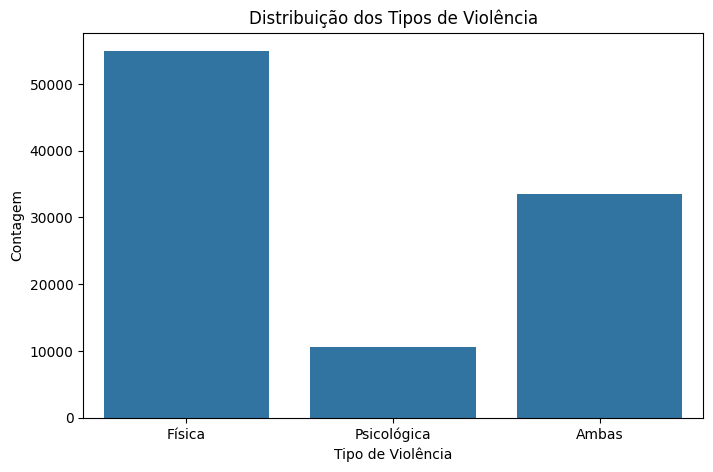

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma nova coluna categórica
def categorizar_violencia(row):
    if row['VIOL_FISIC'] == 1 and row['VIOL_PSICO'] == 1:
        return 'Ambas'
    elif row['VIOL_FISIC'] == 1:
        return 'Física'
    elif row['VIOL_PSICO'] == 1:
        return 'Psicológica'
    else:
        return 'Nenhuma'

df_dados_violencia['Tipo_Violencia'] = df_dados_violencia.apply(categorizar_violencia, axis=1)

# Filtra apenas os casos com algum tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] != 'Nenhuma']

# Plota o gráfico
plt.figure(figsize=(8, 5))
sns.countplot(x='Tipo_Violencia', data=df_filtrado, order=['Física', 'Psicológica', 'Ambas'])
plt.title('Distribuição dos Tipos de Violência')
plt.xlabel('Tipo de Violência')
plt.ylabel('Contagem')
plt.show()


0 = violencia psicol

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria uma nova coluna categórica
def categorizar_violencia(row):
    if row['VIOL_FISIC'] == 1 and row['VIOL_PSICO'] == 1:
        return 2
    elif row['VIOL_FISIC'] == 1:
        return 1
    elif row['VIOL_PSICO'] == 1:
        return 0
    else:
        return 3

df_dados_violencia['Tipo_Violencia'] = df_dados_violencia.apply(categorizar_violencia, axis=1)

# Filtra apenas os casos com algum tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] != 3]

In [28]:
viol_fisica = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] == 1]
print(viol_fisica.head())
(df_dados_violencia['Tipo_Violencia'] == 1).sum()

    UF   ANO    DT_OCOR    DT_NASC  NU_IDADE_N CS_RACA  \
1   AC  2017 2016-12-31 1975-10-29        41.0   Parda   
3   AC  2017 2016-12-31 1988-04-01        28.0   Parda   
9   AC  2017 2017-01-02 1968-06-29        48.0   Parda   
19  AC  2017 2017-01-04 1979-11-29        37.0   Parda   
21  AC  2017 2017-01-04 1994-05-18        22.0   Parda   

                        CS_ESCOL_N      LOCAL_OCOR  VIOL_FISIC  VIOL_PSICO  \
1          Ensino médio incompleto  Bar ou similar         1.0         2.0   
3      Ensino fundamental completo     Via publica         1.0         2.0   
9   5ª à 8ª série incompleta do EF     Via publica         1.0         2.0   
19           Ignorado ou em branco      Residência         1.0         2.0   
21           Ensino médio completo      Residência         1.0         2.0   

    ...  REL_NAMO  REL_EXNAM  REL_FILHO  REL_IRMAO  REL_CONHEC  REL_DESCO  \
1   ...       2.0        2.0        2.0        2.0         2.0        1.0   
3   ...       2.0        2.0

np.int64(54926)

In [29]:
# Casos com apenas VIOL_PSICO == 1
viol_psicologica = df_dados_violencia[df_dados_violencia['Tipo_Violencia'] == 0]
# print(viol_psicologica.head())
(df_dados_violencia['Tipo_Violencia'] == 0).sum()

np.int64(10585)

In [30]:
df_dados_violencia.dtypes

,0
UF,category
ANO,category
DT_OCOR,datetime64[ns]
DT_NASC,datetime64[ns]
NU_IDADE_N,float64
CS_RACA,category
CS_ESCOL_N,category
LOCAL_OCOR,object
VIOL_FISIC,float64
VIOL_PSICO,float64


In [40]:
# Primeiro criamos o dataframe com todas as colunas necessárias para as transformações
colunas_essenciais = [
    'UF',                   # Localização geográfica
    'DT_OCOR',              # Data da ocorrência
    'NU_IDADE_N',           # Idade numérica
    'CS_RACA',              # Raça/cor
    'CS_ESCOL_N',           # Escolaridade
    'LOCAL_OCOR',           # Local da ocorrência
    'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ', 'REL_EXCON',
    'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO', 'REL_CONHEC', 'REL_DESCO',
    'AUTOR_SEXO',           # Sexo do autor
    'OUT_VEZES',            # Reincidência
    'GRUPO_IDADE',          # Grupo etário
    'Tipo_Violencia'        # Classificação de violência já criada
]

df_enxuto = df_filtrado[colunas_essenciais]

# Criar a coluna de Tipo_Relacao
def categorizar_relacao(row):
    # Relações familiares
    if row['REL_PAI'] == 1 or row['REL_MAE'] == 1 or row['REL_PAD'] == 1 or row['REL_MAD'] == 1 or row['REL_FILHO'] == 1 or row['REL_IRMAO'] == 1:
        return 'Familiar'
    # Relações íntimas (atuais ou passadas)
    elif row['REL_CONJ'] == 1 or row['REL_EXCON'] == 1 or row['REL_NAMO'] == 1 or row['REL_EXNAM'] == 1:
        return 'Parceiro/Ex'
    # Conhecidos
    elif row['REL_CONHEC'] == 1:
        return 'Conhecido'
    # Desconhecidos
    elif row['REL_DESCO'] == 1:
        return 'Desconhecido'
    else:
        return 'Não especificado'

df_enxuto['Tipo_Relacao'] = df_enxuto.apply(categorizar_relacao, axis=1)

# Agora removemos as colunas que foram consolidadas
colunas_para_remover = [
    'REL_PAI', 'REL_MAE', 'REL_PAD', 'REL_MAD', 'REL_CONJ', 'REL_EXCON',
    'REL_NAMO', 'REL_EXNAM', 'REL_FILHO', 'REL_IRMAO', 'REL_CONHEC', 'REL_DESCO'
]

# Removendo as colunas de relação específicas
df_enxuto = df_enxuto.drop(columns=colunas_para_remover)

# Definindo as colunas finais que queremos manter
colunas_finais = [
    'UF',                   # Localização geográfica
    'DT_OCOR',              # Data da ocorrência
    'NU_IDADE_N',           # Idade numérica
    'CS_RACA',              # Raça/cor
    'CS_ESCOL_N',           # Escolaridade
    'LOCAL_OCOR',           # Local da ocorrência
    'AUTOR_SEXO',           # Sexo do autor
    'OUT_VEZES',            # Reincidência
    'GRUPO_IDADE',          # Grupo etário
    'Tipo_Violencia',       # Classificação de violência já criada
    'Tipo_Relacao'          # Nova classificação de relação
]

# Garantindo que temos apenas as colunas finais desejadas
df_enxuto = df_enxuto[colunas_finais]

# Verificar o resultado
print(df_enxuto.shape)
print(df_enxuto.columns.tolist())

(99086, 11)
['UF', 'DT_OCOR', 'NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N', 'LOCAL_OCOR', 'AUTOR_SEXO', 'OUT_VEZES', 'GRUPO_IDADE', 'Tipo_Violencia', 'Tipo_Relacao']


<ipython-input-40-e400b5b9422d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enxuto['Tipo_Relacao'] = df_enxuto.apply(categorizar_relacao, axis=1)


In [41]:
df_enxuto.dtypes

,0
UF,category
DT_OCOR,datetime64[ns]
NU_IDADE_N,float64
CS_RACA,category
CS_ESCOL_N,category
LOCAL_OCOR,object
AUTOR_SEXO,float64
OUT_VEZES,float64
GRUPO_IDADE,category
Tipo_Violencia,int64


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Separar features e target
X = df_dados_violencia.drop(columns=["Tipo_Violencia"])
y = df_dados_violencia["Tipo_Violencia"]

# 2. Tratar colunas datetime (extrair ano, mês e dia da semana)
for col in X.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns:
    X[f'{col}_ano'] = X[col].dt.year
    X[f'{col}_mes'] = X[col].dt.month
    X[f'{col}_dia_semana'] = X[col].dt.dayofweek
    X = X.drop(columns=[col])  # Remove a coluna original

# 3. Selecionar colunas para codificação
colunas_onehot = [col for col in ["UF", "CS_RACA", "GRUPO_IDADE", "LOCAL_OCOR"] if col in X.columns]
# CS_ESCOL_N já está numérica, então não precisa de OrdinalEncoder com rótulos textuais
# Se ainda quiser usar ordinal encoding manual (com categorias definidas), precisa mapear antes

# 4. Pré-processador
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), colunas_onehot)
], remainder='passthrough')  # mantém as demais colunas como estão

# 5. Pipeline com modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 6. Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Treinar o modelo
pipeline.fit(X_train, y_train)

# 8. Avaliar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: '1ª a 4ª série incompleta do EF'

In [ ]:
print(X["CS_ESCOL_N"].unique())


In [ ]:
import pandas as pd

# Filtra apenas os casos com um único tipo de violência
df_filtrado = df_dados_violencia[df_dados_violencia['Tipo_Violencia'].isin([0, 1])].copy()

# Define a classe como a coluna Tipo_Violencia
df_filtrado['CLASSE'] = df_filtrado['Tipo_Violencia']

# Remove colunas que não serão usadas como preditoras
X = df_filtrado.drop(columns=['VIOL_FISIC', 'VIOL_PSICO', 'Tipo_Violencia', 'CLASSE'])
y = df_filtrado['CLASSE']

# Exibe as informações
print("Formato final do dataset:")
print("Features (X):", X.shape)
print("Classe (y):", y.shape)
print("Distribuição das classes:\n", y.value_counts())


In [ ]:
df_filtrado.columns

### BAIXANDO O ARQUIVO PKL

In [ ]:
import pickle

# Salva X
with open('X_tratado.pkl', 'wb') as f:
    pickle.dump(X, f)

# Salva y
with open('y_tratado.pkl', 'wb') as f:
    pickle.dump(y, f)


### QUANDO FOR IMPORTAR ELES PARA TREINAR:

In [ ]:
import pickle

# Carrega X
with open('X_tratado.pkl', 'rb') as f:
    X = pickle.load(f)

# Carrega y
with open('y_tratado.pkl', 'rb') as f:
    y = pickle.load(f)

# Verifica se tá certo
print(X.shape, y.shape)


In [ ]:
for coluna in X.columns:
    print(f'\nColuna: {coluna}')
    print(X[coluna].unique())


### Testando algoritmos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X is your DataFrame with categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a ColumnTransformer to one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.select_dtypes(exclude=['object', 'category']).columns.tolist()), #keep numerical
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)],
    remainder='drop'
)


# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Now you can fit the pipeline directly
pipeline.fit(X_train, y_train)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
